## Animations
We can see that the energy and angular momentum definitely change.  There are some bumps and wiggles - when are these happening?  While we'll tackle this a bit more next week, right now we'll try out something useful to see what is happening when - animations!

In [1]:
# lets import some things:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from JSAnimation.IPython_display import display_animation
from matplotlib import animation


# if you get an error try:
!pip install JSAnimation

Let's add in our usual setup things that we've used this for:

In [2]:
star_mass = 1.0 # stellar mass in Msun
planet_masses = np.array( [1.0, 0.5] ) # planet masses in Mjupiter

# [x,y,z] coords for each planet in AU
# NOTE: no z-coords!  These will be set to zero later on 
#   if you make them non-zero
planet_initial_position = np.array([ [1.0, 0.0, 0.0], 
                                     [0.0, 2.0, 0.0]])

# planet's velocity at each position in km/s
# NOTE: no z-velocities!  These will be set to zero later on 
#   if you make them non-zero
planet_initial_velocity = np.array([ [0.0, 35,   0.0],
                                     [15.0, 0.0, 0.0]])

# note: this assumes that the star is at (0, 0, 0) and has zero 
#  initial velocity

Do simulation:

In [3]:
from hermite_library import do_hermite
r_h, v_h, t_h, E_h = do_hermite(star_mass, 
                                planet_masses, 
                                planet_initial_position, 
                                planet_initial_velocity, 
                               tfinal=1e5*5000, Nsteps=5000,
                               threeDee=True) # so sneaky, here the whole time!

Let's make a plot to see what things look like:

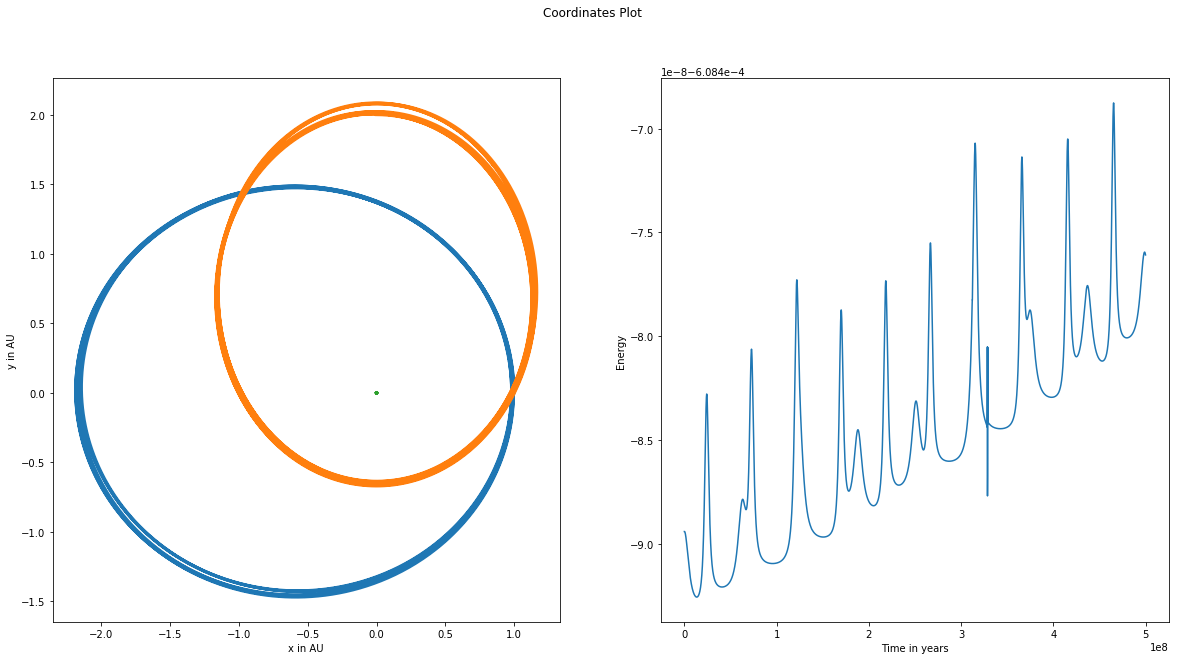

In [4]:
# let's plot!
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

# recall:
# r_h[NUMBER OF PARTICLES, NUMBER COORDINATES (X,Y,Z), NUMBER OF TIMESTEPS]
for i in range(r_h.shape[0]):
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

ax[1].set_xlabel('Time in years')
ax[1].set_ylabel('Energy')
# re-norm energy
ax[1].plot(t_h, E_h)

plt.show()

So, we should expect that if we make a movie of this developing, this should be the final frame of our movie.

One thing we need to be aware of is that the more time steps we want to show, i.e. the number of `frames`, the longer it will take to generate this animation, and the longer it will take to save to a file.  So we are going to *subsample* our dataset for outputing purposes.

In [5]:
# plot how many steps?  i.e. every X number of steps?
# we probably don't want a huge movie with every step
stepSize = 50

In [6]:
# r_h[number of particles, number of coords, number of times]
# subsample
# we will subsample time with indexing like: start:stop:step
r = r_h[:,:,0:-1:stepSize]
t = t_h[0:-1:stepSize]
E = E_h[0:-1:stepSize]

r.shape, r_h.shape

((3, 3, 100), (3, 3, 5000))

What will this new plot look like?  We can take a gander:

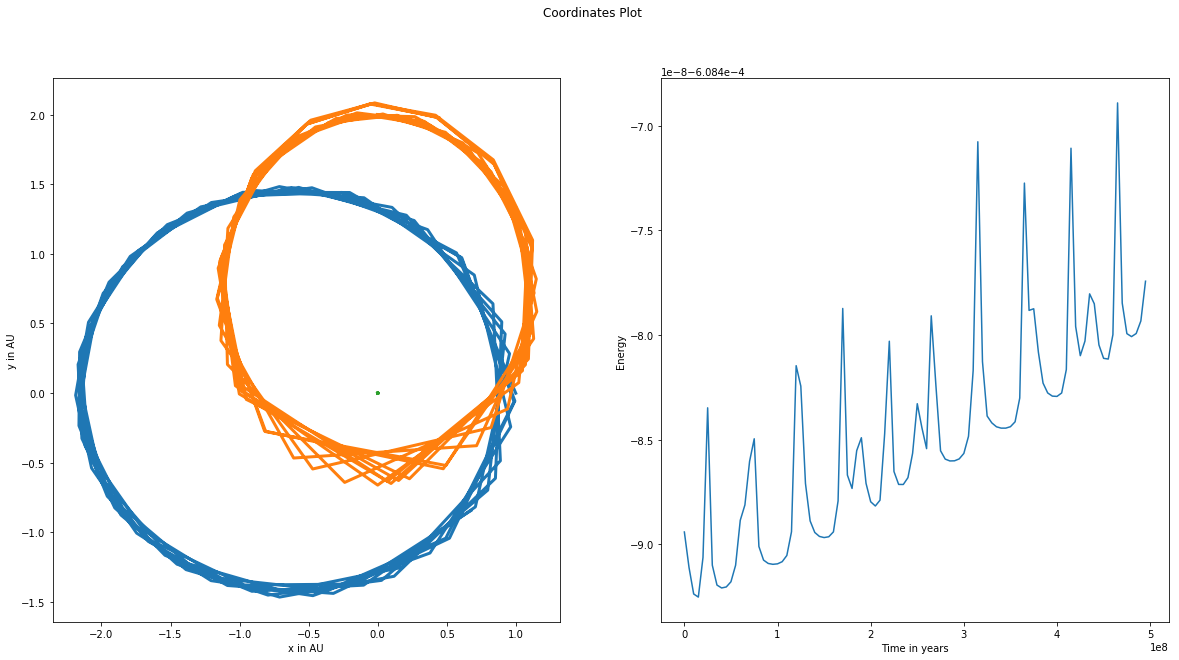

In [7]:
# let's plot!
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

# recall:
# r[NUMBER OF PARTICLES, NUMBER COORDINATES (X,Y,Z), NUMBER OF TIMESTEPS]
for i in range(r.shape[0]):
    ax[0].plot(r[i,0,:], r[i,1,:], lw=3)

ax[1].set_xlabel('Time in years')
ax[1].set_ylabel('Energy')
# re-norm energy
ax[1].plot(t, E)

plt.show()

So, a little jagged, but we can always decrease the step size for saving our final movie.

We will now call plotting in a funny way.  We have to first set up a "place holder" figure that will not plot anything, but be our figure object.  Let's start with just plots in the x/y coordinate space + energy vs. time.

Note this only plots 2 planets, and not the central star.  Feel free to modify for your planetary system or if you want to include the star!

In [8]:
# want to know more about the function we'll be using to animate?
animation.FuncAnimation?

(-0.0006084925697725612, -0.0006084687604128736)

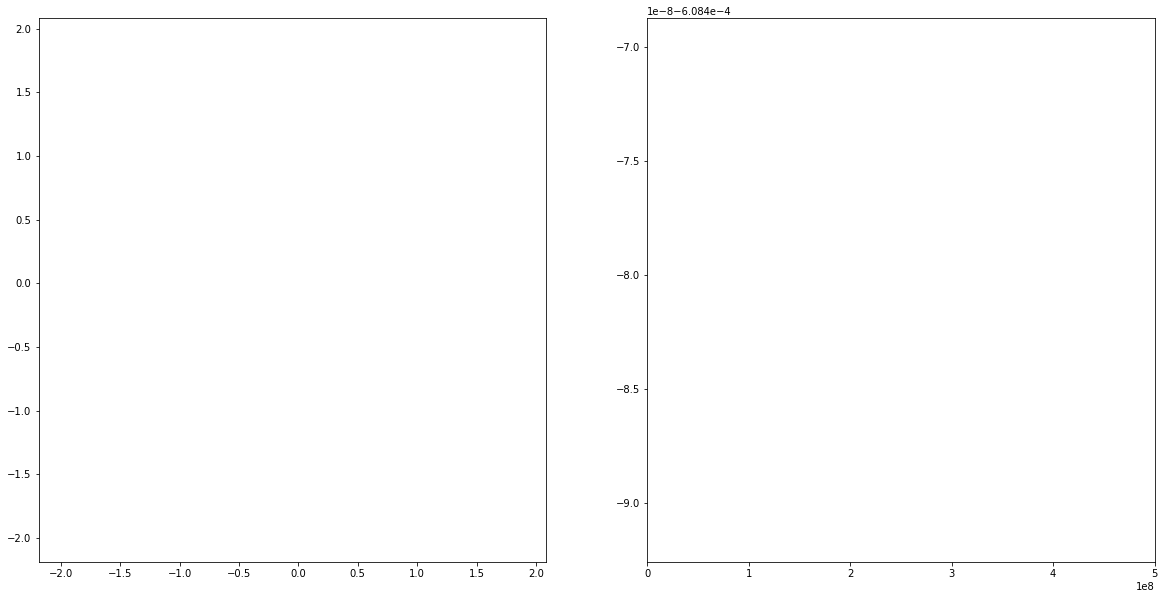

In [9]:
# initalize our figure
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))

# empty placeholders for different plots
trajectory1, = ax[0].plot([], []) # particle 1
trajectory2, = ax[0].plot([], []) # particle 2

energy, = ax[1].plot([],[])

# set bounds - auto set based on position vector
ax[0].set_xlim(r_h.min(), r_h.max())
ax[0].set_ylim(r_h.min(), r_h.max())

ax[1].set_xlim(t_h.min(),t_h.max())
ax[1].set_ylim(E_h.min(),E_h.max())

# here there will be nothing showing up, but we can check our 
#  x/y coords look good

In [15]:
# how many frames to plot?
nFrames = len(t)

print('Number of frames = ', nFrames)

# we need to initialize stuff - just setting data
# this is a special function the animation routine is expecting
def init():
    trajectory1.set_data([], [])
    trajectory2.set_data([], [])
    energy.set_data([], [])
    return trajectory1, trajectory2, energy

# now, each time we step through
# again, this is a special function that the animation routine is expecting
def animate(i):
    #print(i)
    # r[NUMBER OF PARTICLES, NUMBER COORDINATES (X,Y,Z), NUMBER OF TIMESTEPS]
    # the ":i" means all time points up to i and i is what will be increasing
    #  for each frame of our animation
    trajectory1.set_data(r[0,0,:i], 
                         r[0,1,:i])
    trajectory2.set_data(r[1,0,:i], 
                         r[1,1,:i])
    
    energy.set_data(t[:i], E[:i])
    
    return trajectory1, trajectory2, energy
  
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nFrames, interval=200, 
                               blit=True, repeat=True)

# call our new function to display the animation
display_animation(anim)

Number of frames =  100


Traceback (most recent call last):
  File "/Users/jillnaiman1/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/Users/jillnaiman1/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/Users/jillnaiman1/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1743, in _init_draw
    self._drawn_artists = self._init_func()
  File "<ipython-input-15-59951e505b11>", line 12, in init
    return bytes(trajectory1), trajectory2, energy
TypeError: cannot convert 'Line2D' object to bytes


TypeError: cannot convert 'Line2D' object to bytes

You can see that at perhelion, the place of closest approach, we have a large drop off in energy/angular momentum.

This makes sense since the force of gravity is strongest here.

### Exercise
Try this out with different masses.

Bonus: do this with more than 2 planets and/or your favorite planetary system.

Bonus: of each of the planets in our solar system, which has the largest effect on the motion of the Sun?

## Saving your animation
There are a few ways to save your animation.  The easiest is making a gif.

In [49]:
anim.save('myAnimation.gif')

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


The above is now saved to this current folder and you can open it with your favorite gif-opening software. (I have personally not found a good one on a mac, but VLC might do it).

You can also just go to your Jupyter notebook home and double click on it to open up in your browser like you would any notebook file.